In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Virat Kohli - One Day Internationals - Performance Analysis by Year - Sheet1.csv')

In [3]:
data

,Year,Mat,Inns,NO,100s,50s,0s,HS,Runs,Avg,S/R,Ca,St
0,2008,5,5,0,0,1,0,54,159,31.80,66.53,3,0
1,2009,10,8,2,1,2,0,107,325,54.17,84.42,4,0
2,2010,25,24,3,3,7,3,118,995,47.38,85.12,9,0
3,2011,34,34,5,4,8,2,117,1381,47.62,85.56,19,0
4,2012,17,17,2,5,3,1,183,1026,68.40,93.78,14,0
5,2013,34,30,6,4,7,3,115*,1268,52.83,97.54,11,0
6,2014,21,20,2,4,5,1,139*,1054,58.56,99.62,8,0
7,2015,20,20,3,2,1,0,138,623,36.65,80.60,11,0
8,2016,10,10,2,3,4,0,154*,739,92.38,100.00,6,0
9,2017,26,26,7,6,7,2,131,1460,76.84,99.12,9,0


Forecasting the S/R for next year

In [4]:
df = data[['Year','S/R']]

In [5]:
df = df[:-1]

In [6]:
df

,Year,S/R
0,2008,66.53
1,2009,84.42
2,2010,85.12
3,2011,85.56
4,2012,93.78
5,2013,97.54
6,2014,99.62
7,2015,80.60
8,2016,100.00
9,2017,99.12


In [7]:
df.rename(columns={'Year': 'ds', 'S/R': 'y'}, inplace=True)

In [8]:
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
df['y'] = np.log(df['y'])

In [10]:
df

,ds,y,y_orig
0,2008-01-01,4.197653,66.53
1,2009-01-01,4.435804,84.42
2,2010-01-01,4.444062,85.12
3,2011-01-01,4.449218,85.56
4,2012-01-01,4.540952,93.78
5,2013-01-01,4.580263,97.54
6,2014-01-01,4.601363,99.62
7,2015-01-01,4.389499,80.60
8,2016-01-01,4.605170,100.00
9,2017-01-01,4.596331,99.12


In [11]:
model = Prophet() #instantiate Prophet
model.fit(df)

12:39:04 - cmdstanpy - INFO - Chain [1] start processing
12:39:05 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future_data = model.make_future_dataframe(periods=1, freq='Y')

In [13]:
future_data

,ds
0,2008-01-01
1,2009-01-01
2,2010-01-01
3,2011-01-01
4,2012-01-01
5,2013-01-01
6,2014-01-01
7,2015-01-01
8,2016-01-01
9,2017-01-01


In [14]:
forecast_data = model.predict(future_data)

In [27]:
np.exp(list(forecast_data['yhat'])[-1])

87.94365566801756

In [15]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
6,2014-01-01,4.546309,4.465751,4.622545
7,2015-01-01,4.535428,4.455322,4.609768
8,2016-01-01,4.536631,4.460244,4.611098
9,2017-01-01,4.604569,4.530582,4.679795
10,2018-01-01,4.581558,4.504891,4.661564
11,2019-01-01,4.536369,4.460281,4.611617
12,2020-01-01,4.503229,4.428478,4.577634
13,2021-01-01,4.536791,4.463961,4.609828
14,2022-01-01,4.479557,4.405271,4.558335
15,2022-12-31,4.476696,4.400465,4.545950


C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


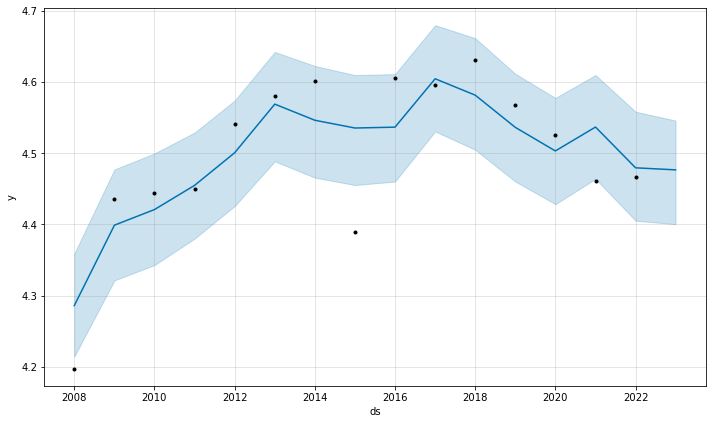

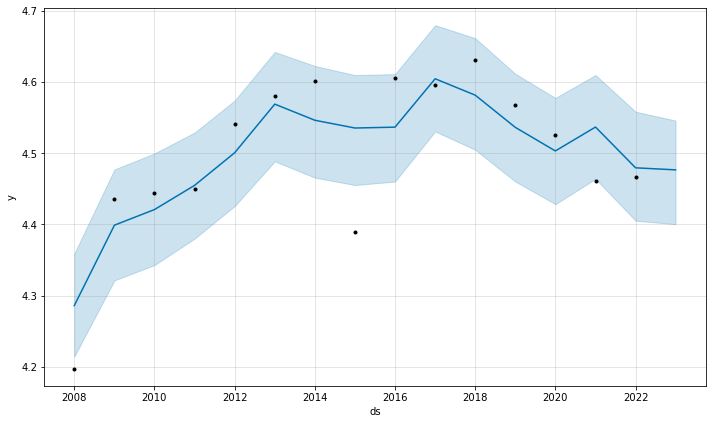

In [16]:
model.plot(forecast_data)

C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


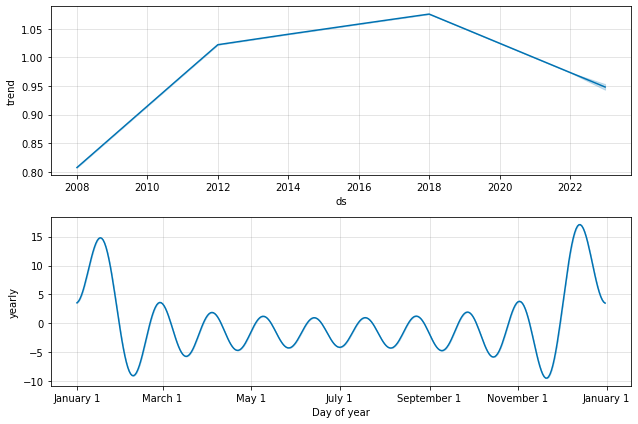

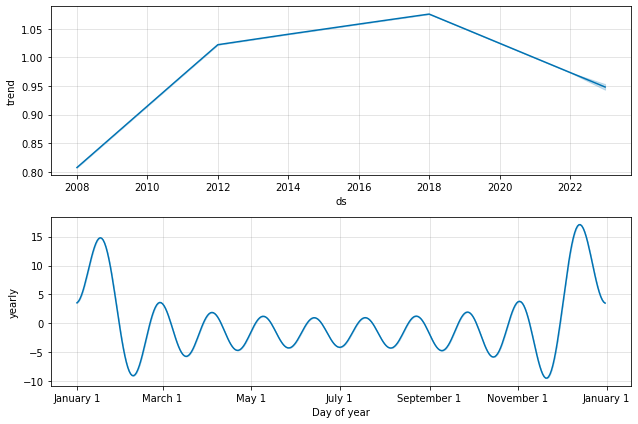

In [17]:
model.plot_components(forecast_data)

In [18]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

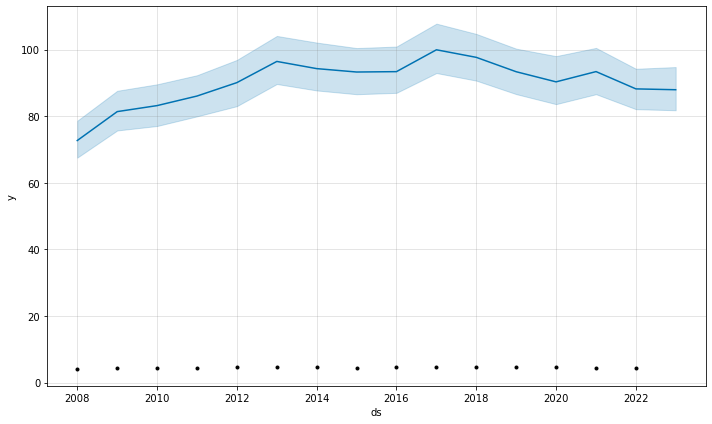

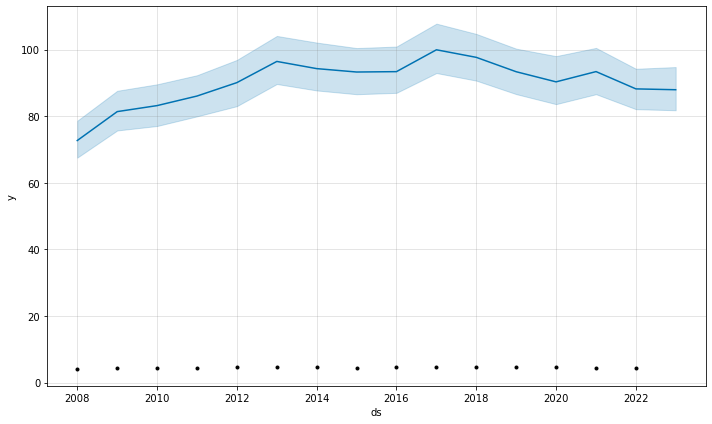

In [19]:
model.plot(forecast_data_orig)

In [20]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [21]:
final_df = pd.DataFrame(forecast_data_orig)

In [22]:
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [23]:
df

,ds,y,y_orig,y_log
0,2008-01-01,66.53,66.53,4.197653
1,2009-01-01,84.42,84.42,4.435804
2,2010-01-01,85.12,85.12,4.444062
3,2011-01-01,85.56,85.56,4.449218
4,2012-01-01,93.78,93.78,4.540952
5,2013-01-01,97.54,97.54,4.580263
6,2014-01-01,99.62,99.62,4.601363
7,2015-01-01,80.60,80.60,4.389499
8,2016-01-01,100.00,100.00,4.605170
9,2017-01-01,99.12,99.12,4.596331


In [24]:
future_data

,ds
0,2008-01-01
1,2009-01-01
2,2010-01-01
3,2011-01-01
4,2012-01-01
5,2013-01-01
6,2014-01-01
7,2015-01-01
8,2016-01-01
9,2017-01-01


In [25]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,0.807513,67.544112,78.629004,0.807513,0.807513,3.478571,3.478571,3.478571,3.478571,3.478571,3.478571,0.0,0.0,0.0,72.681277
1,2009-01-01,0.861339,75.706119,87.625826,0.861339,0.861339,3.537694,3.537694,3.537694,3.537694,3.537694,3.537694,0.0,0.0,0.0,81.372093
2,2010-01-01,0.915017,77.049867,89.570341,0.915017,0.915017,3.505952,3.505952,3.505952,3.505952,3.505952,3.505952,0.0,0.0,0.0,83.176814
3,2011-01-01,0.968671,79.943857,92.294213,0.968671,0.968671,3.486220,3.486220,3.486220,3.486220,3.486220,3.486220,0.0,0.0,0.0,86.046749
4,2012-01-01,1.022080,83.008100,96.890681,1.022080,1.022080,3.478571,3.478571,3.478571,3.478571,3.478571,3.478571,0.0,0.0,0.0,90.075757
5,2013-01-01,1.031263,89.660774,104.094816,1.031263,1.031263,3.537694,3.537694,3.537694,3.537694,3.537694,3.537694,0.0,0.0,0.0,96.443408
6,2014-01-01,1.040357,87.725595,102.106649,1.040357,1.040357,3.505952,3.505952,3.505952,3.505952,3.505952,3.505952,0.0,0.0,0.0,94.283741
7,2015-01-01,1.049209,86.592789,100.459014,1.049209,1.049209,3.486220,3.486220,3.486220,3.486220,3.486220,3.486220,0.0,0.0,0.0,93.263437
8,2016-01-01,1.058060,87.005651,100.906693,1.058060,1.058060,3.478571,3.478571,3.478571,3.478571,3.478571,3.478571,0.0,0.0,0.0,93.375661
9,2017-01-01,1.066875,92.954699,107.791952,1.066875,1.066875,3.537694,3.537694,3.537694,3.537694,3.537694,3.537694,0.0,0.0,0.0,99.939900
